In [0]:
%run "../includes/configuration"

In [0]:
USE f1_presentation

In [0]:
SELECT * FROM calculated_race_results limit(10)

race_year,constructs_name,drivers_name,position,points,calculated_points
2008,McLaren,Lewis Hamilton,1,10.0,10
2008,BMW Sauber,Nick Heidfeld,2,8.0,9
2008,Williams,Nico Rosberg,3,6.0,8
2008,Renault,Fernando Alonso,4,5.0,7
2008,McLaren,Heikki Kovalainen,5,4.0,6
2008,Williams,Kazuki Nakajima,6,3.0,5
2008,Toro Rosso,Sébastien Bourdais,7,2.0,4
2008,Ferrari,Kimi Räikkönen,8,1.0,3
2008,BMW Sauber,Robert Kubica,null,0.0,null
2008,Toyota,Timo Glock,null,0.0,null


In [0]:
CREATE OR REPLACE TEMP VIEW v_dominant_teams AS
SELECT constructs_name as team_name,
sum(calculated_points) as total_points,
avg(calculated_points) as avg_points,
count(1) as total_races,
rank() Over(ORDER BY avg(calculated_points) desc) team_rank
FROM calculated_race_results
GROUP BY team_name
HAVING count(1) >= 100
ORDER BY avg_points DESC


In [0]:
SELECT constructs_name,
sum(calculated_points) as total_points,
avg(calculated_points) as avg_points,
count(1) as total_races
FROM calculated_race_results
WHERE race_year BETWEEN 2011 and 2020
GROUP BY constructs_name
HAVING count(1) >= 60
ORDER BY avg_points DESC
LIMIT(10)

constructs_name,total_points,avg_points,total_races
Mercedes,2516,7.087323943661972,392
Red Bull,2143,6.397014925373134,392
Ferrari,2027,5.87536231884058,392
Lotus F1,275,2.391304347826087,154
McLaren,701,2.190625,392
Racing Point,115,1.7692307692307692,76
Force India,469,1.7054545454545456,316
Renault,117,0.6324324324324324,238
Toro Rosso,-106,-0.37857142857142856,358
Williams,-258,-0.7724550898203593,392


In [0]:
SELECT constructs_name,
sum(calculated_points) as total_points,
avg(calculated_points) as avg_points,
count(1) as total_races
FROM calculated_race_results
WHERE race_year BETWEEN 2001 and 2010
GROUP BY constructs_name
HAVING count(1) >= 60
ORDER BY avg_points DESC
LIMIT(10)

constructs_name,total_points,avg_points,total_races
Ferrari,2049,6.6742671009771986,352
McLaren,1692,6.360902255639098,352
Renault,1097,4.51440329218107,318
BAR,382,3.673076923076923,170
Red Bull,568,3.527950310559006,216
BMW Sauber,407,3.3916666666666666,140
Williams,778,3.0155038759689923,352
Sauber,310,2.0805369127516777,212
Toyota,397,1.9653465346534653,280
Jaguar,117,1.6027397260273972,136


In [0]:

SELECT race_year,
constructs_name as team_name, 
count(1) as total_races, 
SUM(calculated_points) as total_points,
AVG(calculated_points) as avg_points
FROM f1_presentation.calculated_race_results
WHERE constructs_name in (SELECT team_name FROM v_dominant_teams WHERE team_rank <= 10)
GROUP BY race_year, team_name
ORDER BY race_year, avg_points DESC

race_year,team_name,total_races,total_points,avg_points
1950,Ferrari,15,57,7.125
1950,Maserati,35,39,2.7857142857142856
1951,Ferrari,33,168,7.304347826086956
1951,BRM,4,10,5.0
1951,Maserati,14,4,1.3333333333333333
1952,Ferrari,49,199,6.21875
1952,Maserati,25,9,0.8181818181818182
1953,Maserati,45,155,6.458333333333333
1953,Ferrari,48,225,6.25
1954,Mercedes,18,96,8.0


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

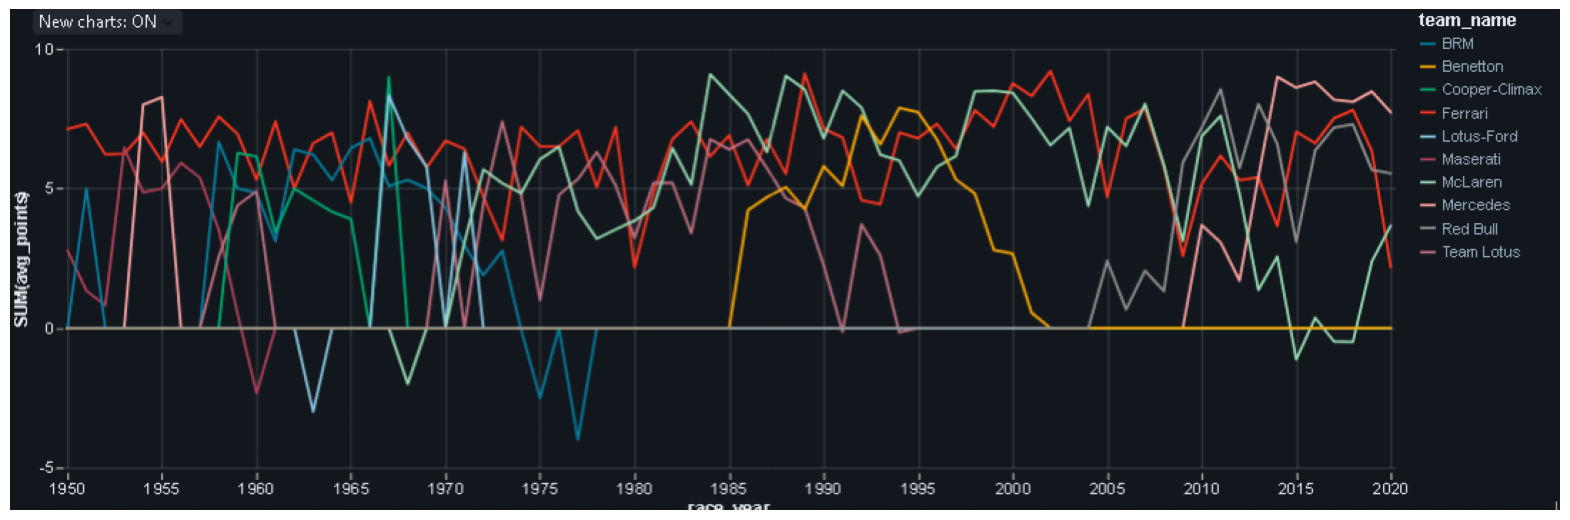

In [0]:
%python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = f"/dbfs{images_folder_path}/image4.png"
img = mpimg.imread(image_path)

plt.figure(figsize=(20, 10))  # Adjust the size (width, height) in inches
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

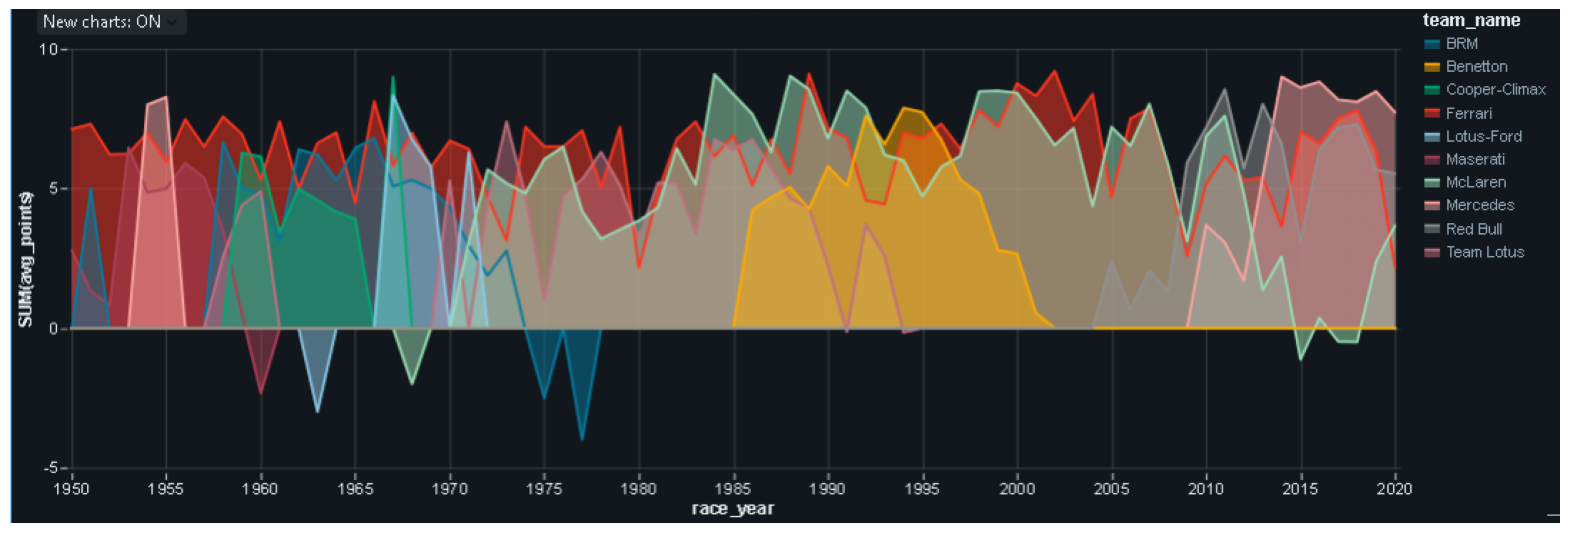

In [0]:
%python
image_path = f"/dbfs{images_folder_path}/image5.png"
img = mpimg.imread(image_path)

plt.figure(figsize=(20, 10))  # Adjust the size (width, height) in inches
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()
